In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def rose_diagram(azimuths):
    """
    Create a rose diagram to visualize the distribution of azimuths.

    Parameters:
    -----------
    azimuths : array-like
        An array of azimuth values (in degrees) representing directions.

    Returns:
    --------
    matplotlib.figure.Figure
        The matplotlib Figure object containing the rose diagram.

    This function takes a list of azimuth values and creates a rose diagram to
    visualize the distribution of directions from 0 to 360 degrees. It calculates 
    the frequency of azimuths within each 10-degree bin and then plots the data 
    in a polar coordinate system. The rose diagram includes a radial grid, 
    azimuth labels, and bars representing the azimuth frequencies.

    Example usage:
    -------------
    >>> import matplotlib.pyplot as plt
    >>> import numpy as np
    >>> azimuth_data = np.random.uniform(0, 360, 100)  # Generate random azimuth data
    >>> fig = rose_diagram(azimuth_data)
    >>> plt.show()
    """
    # determine histogram values
    frequency, bins = np.histogram(azimuths, bins=np.arange(0, 361, 10))

    # create polar plot
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, polar=True)

    # plot the rose diagram grid
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

    # plot the frequency bars
    ax.bar(
        np.deg2rad(bins), 
        np.append(frequency, frequency[0]), 
        width=np.deg2rad(10), 
        bottom=0.0, 
        color='.8',
        edgecolor='k',
        linewidth=0.4,
        zorder=10
    )

    return fig

In [6]:
picks = pd.read_csv('1_Pre-processed data.csv')
fractures = picks[(picks['type'] == 'Conductive, HC') | (picks['type'] == 'Conductive, LC')].copy()

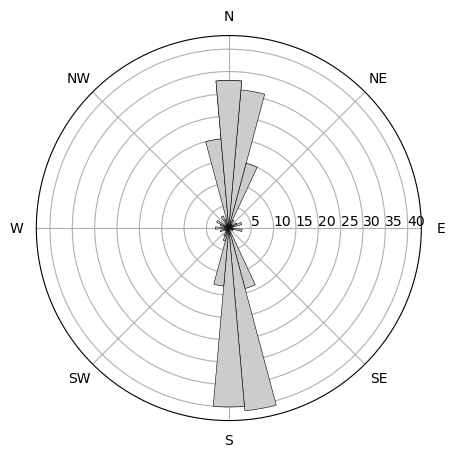

In [9]:
fig = rose_diagram(fractures.dip_az.values)

#plt.savefig('5 Rose diagram.png')